In [16]:
# 1,2)Download and load dataset 
import pandas as pd
df=pd.read_csv("/content/Churn_Modelling.csv");
print(df)


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [18]:
#3)Univariate Analysis
import pandas as pd
print(df['Balance'] > 90000)
print("Mean = ", df['Balance'].mean())
print("Median = ", df['Balance'].median())

0       False
1       False
2        True
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999     True
Name: Balance, Length: 10000, dtype: bool
Mean =  76485.889288
Median =  97198.54000000001


Text(0, 0.5, 'Estimated Salary')

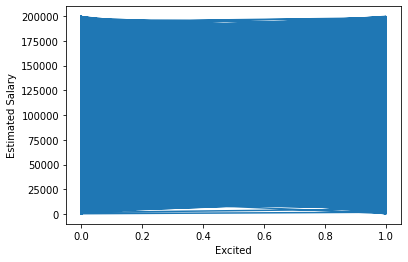

In [24]:
#3)Bivariate Analysis
import matplotlib.pyplot as plt
x = df['Exited']
y = df['EstimatedSalary']

plt.plot(x,y)
plt.xlabel("Excited")
plt.ylabel("Estimated Salary")

(10000, 14)


Text(0, 0.5, 'Y-axis')

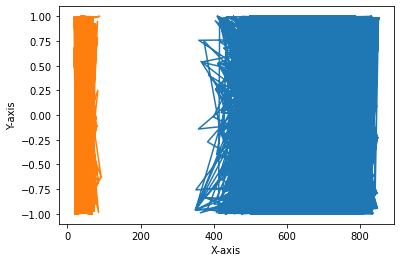

In [28]:
#3)Multivariate Analysis
import matplotlib.pyplot as plt
import numpy as np 
print(df.shape)

x = df['CreditScore']
y = np.sin(x)

x1 = df['Age']
y1 = np.cos(x1)

plt.plot(x,y)
plt.plot(x1,y1)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [30]:
#4)Descriptive statistics on the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
#5)Handle the Missing values
print(df.isna().all())

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


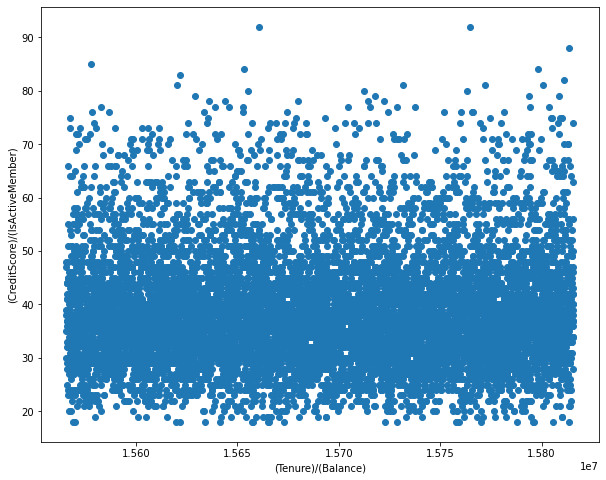

In [38]:
#6)Find the outliers and replace the outliers
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df['CustomerId'], df['Age'])
ax.set_xlabel('(Tenure)/(Balance)')
ax.set_ylabel('(CreditScore)/(IsActiveMember)')
plt.show()

In [39]:
#7)Check for Categorical columns and perform encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [45]:
#8)Split the data into dependent and independent variables
#Independent
X= df.iloc[ : , :-1].values
Y= df.iloc[ : , 4].values
print(X)
print(Y)

[[1.0000000e+00 1.5634602e+07 1.1150000e+03 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [2.0000000e+00 1.5647311e+07 1.1770000e+03 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [3.0000000e+00 1.5619304e+07 2.0400000e+03 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [9.9980000e+03 1.5584532e+07 1.5700000e+03 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [9.9990000e+03 1.5682355e+07 2.3450000e+03 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+04 1.5628319e+07 2.7510000e+03 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]
[0 2 0 ... 0 1 0]


In [49]:
#9)Scale the independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-1.73187761 -0.78321342 -0.46418322 ...  0.64609167  0.97024255
   0.02188649]
 [-1.7315312  -0.60653412 -0.3909112  ... -1.54776799  0.97024255
   0.21653375]
 [-1.73118479 -0.99588476  0.62898807 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 1.73118479 -1.47928179  0.07353887 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.7315312  -0.11935577  0.98943914 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.73187761 -0.87055909  1.4692527  ...  0.64609167 -1.03067011
  -1.07636976]]


In [51]:
#10)Split the data into training and testing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.05, random_state=0)
print(X_train, X_test)
print(Y_train, Y_test)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
799         800    15567367     2576          601          1       0   42   
1069       1070    15628674     1260          844          0       1   40   
8410       8411    15609913      563          743          0       0   46   
9436       9437    15771000     2205          684          0       1   38   
5099       5100    15731555     2315          595          1       0   45   
...         ...         ...      ...          ...        ...     ...  ...   
9225       9226    15584928     2680          594          1       0   32   
4859       4860    15647111     2803          794          2       0   22   
3264       3265    15574372     1202          738          0       1   35   
9845       9846    15664035     2122          590          2       0   38   
2732       2733    15592816     2678          623          1       0   48   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
799   